In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import string as st
import os
import visualkeras
from PIL import ImageFont
from collections import defaultdict

## Loading the dataset

In [95]:
x_train, y_train, x_test, y_test = np.load('final_dataset.npy', allow_pickle=True)

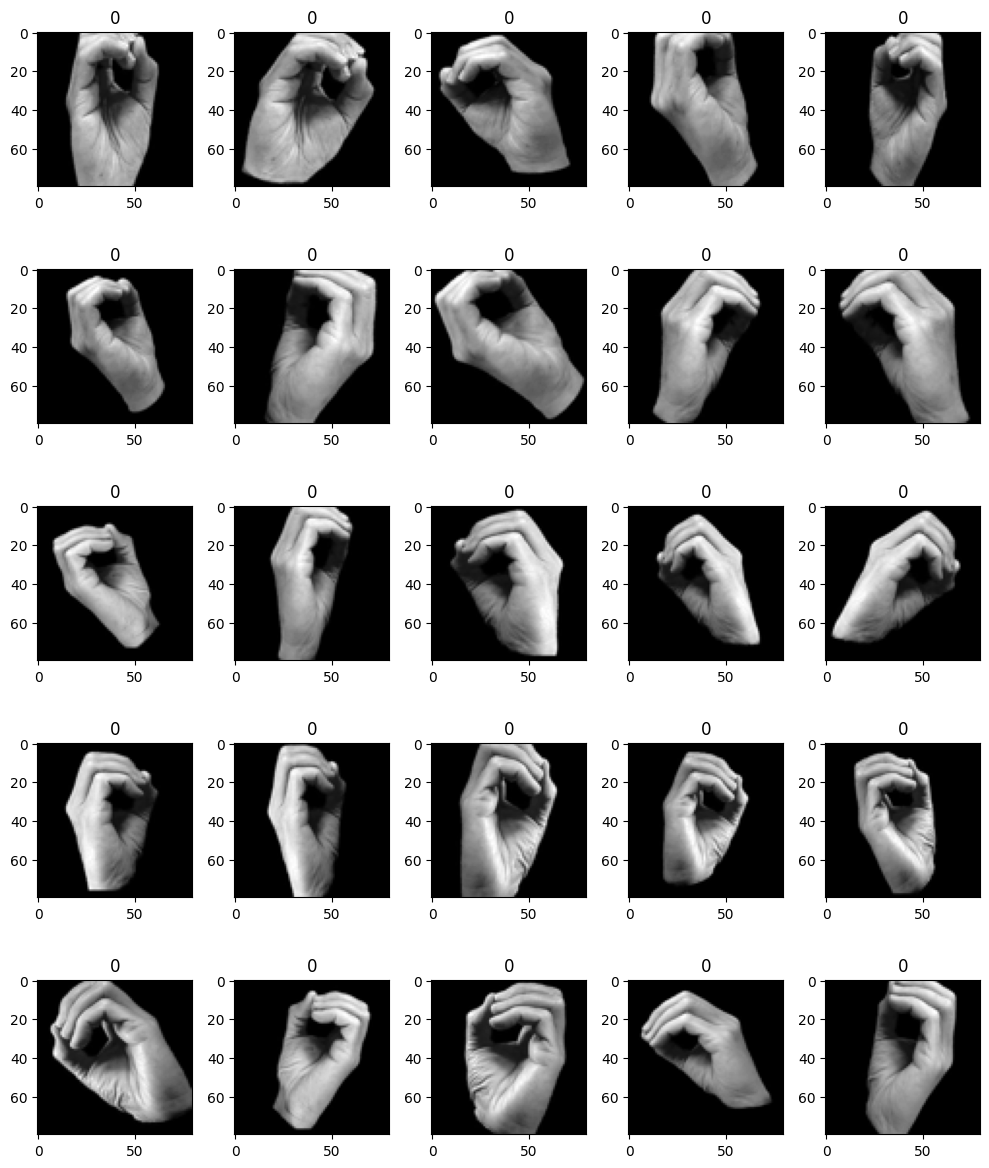

In [4]:
# Plot the first 25 images from the train dataset
fig, axs = plt.subplots(5, 5, figsize=(10, 12), tight_layout=True)
rows = axs.shape[0]
cols = axs.shape[1]
ind = 0
chars = st.digits + st.ascii_lowercase
for r in range(rows):
    for c in range(cols):
        axs[r, c].imshow(x_train[ind], cmap='gray')
        axs[r, c].set_title('{}'.format((lambda label : chars[label])(y_train[ind])))
        ind += 1
plt.show()

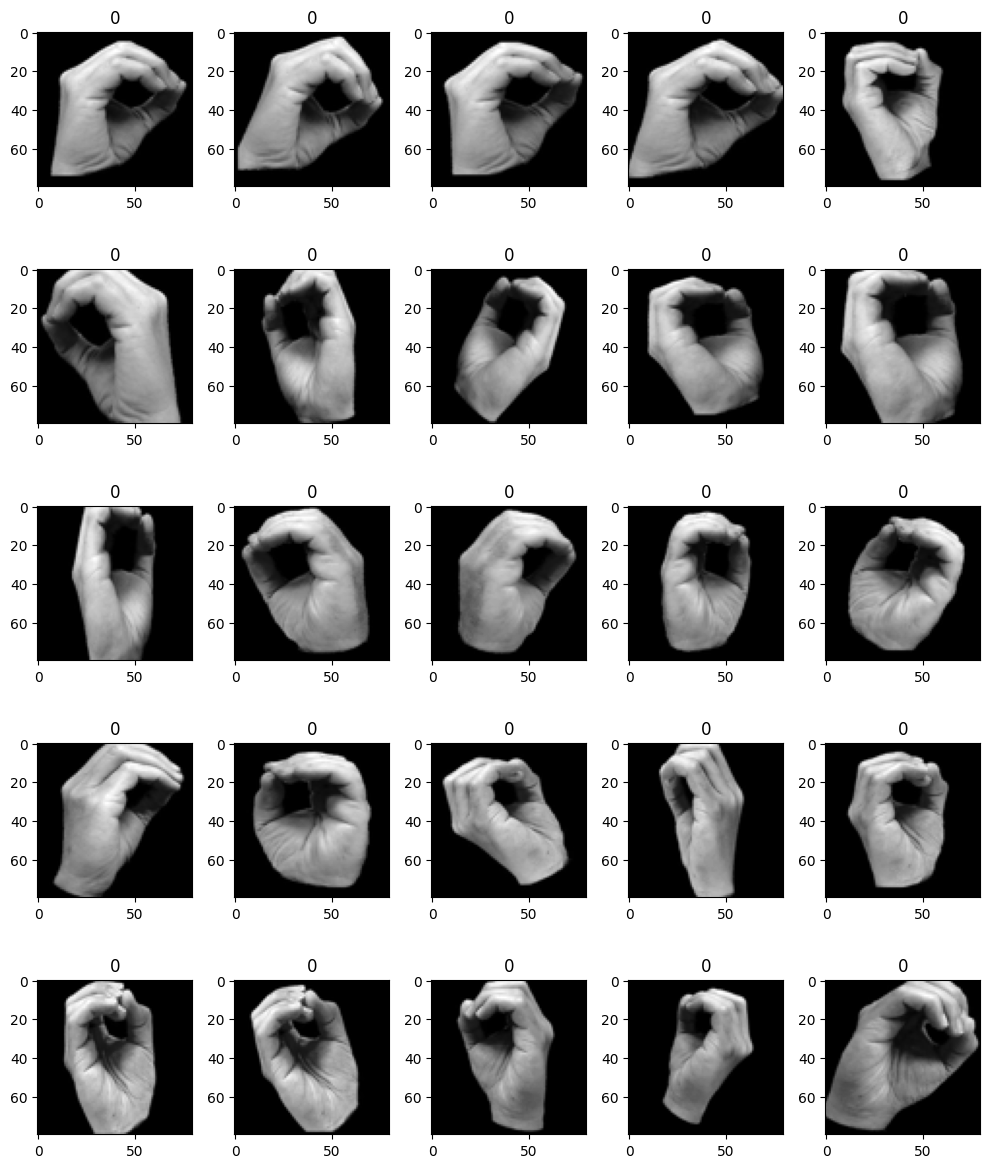

In [5]:
# Plot the first 25 images from the test dataset
fig, axs = plt.subplots(5, 5, figsize=(10, 12), tight_layout=True)
rows = axs.shape[0]
cols = axs.shape[1]
ind = 0
chars = st.digits + st.ascii_lowercase
for r in range(rows):
    for c in range(cols):
        axs[r, c].imshow(x_test[ind], cmap='gray')
        axs[r, c].set_title('{}'.format((lambda label : chars[label])(y_test[ind])))
        ind += 1
plt.show()

In [6]:
num_classes = np.bincount(y_train).shape[0]
num_classes

36

## Building the model

In [92]:
# Initialize the model
input_shape = (32, 80, 80, 1)
model = Sequential([
    layers.Rescaling(1/255),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=2, strides=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=(2, 2)),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=(2, 2)),
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [93]:
# Loading the model
# model = keras.models.load_model('my_model1.h5')

In [94]:
model.build((32, 80, 80, 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (32, 80, 80, 1)           0         
                                                                 
 conv2d_6 (Conv2D)           (32, 80, 80, 64)          640       
                                                                 
 conv2d_7 (Conv2D)           (32, 80, 80, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 40, 40, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 40, 40, 128)         73856     
                                                                 
 conv2d_9 (Conv2D)           (32, 40, 40, 128)         147584    
                                                      

In [100]:
font = ImageFont.truetype("arial.ttf", 15)
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = 'orange'
color_map[layers.UpSampling2D]['fill'] = 'gray'
color_map[layers.MaxPooling2D]['fill'] = 'red'

visualkeras.layered_view(model, legend=True, color_map=color_map, font=font, 
                       scale_xy=10, scale_z=2, min_z=0.1, to_file='output.png').show()

## Training the model

In [96]:
x_train.shape

(37800, 80, 80)

In [97]:
# Reshaping the data to add the channel at the end
ax1_train, ax2_train, ax3_train = x_train.shape
ax1_test, ax2_test, ax3_test = x_test.shape
x_train = x_train.reshape(ax1_train, ax2_train, ax3_train, 1)
x_test = x_test.reshape(ax1_test, ax2_test, ax3_test, 1)

In [98]:
x_train.shape

(37800, 80, 80, 1)

In [99]:
# Compile
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, shuffle=True)

Epoch 1/5
   3/1182 [..............................] - ETA: 2:00:38 - loss: 3.5878 - accuracy: 0.0208   

KeyboardInterrupt: 

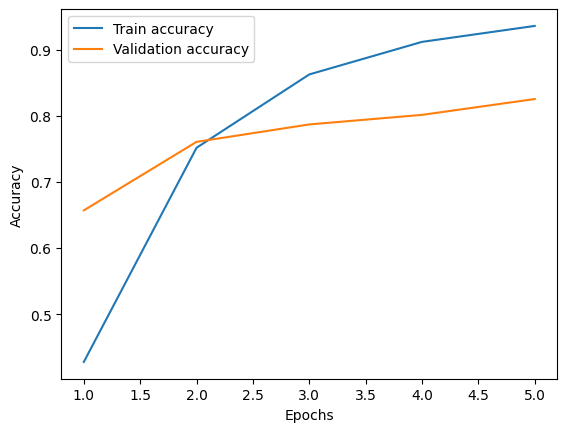

In [22]:
# Plot the accuracy
x = np.arange(1, 5+1)
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']

plt.plot(x, y1, label='Train accuracy')
plt.plot(x, y2, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig(os.path.join('metrics', 'final_acc'))
plt.show()

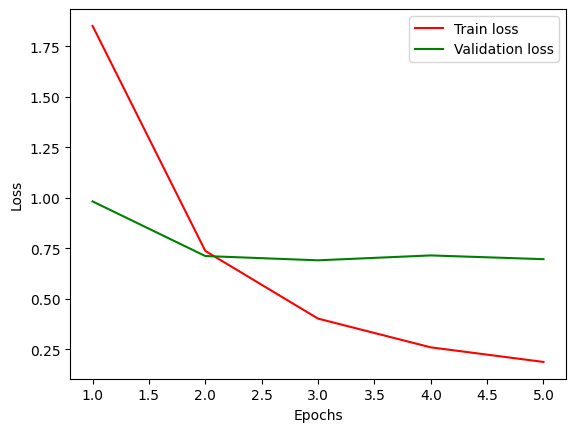

In [24]:
# Plot the loss
x = np.arange(1, 5+1)
y1 = history.history['loss']
y2 = history.history['val_loss']

plt.plot(x, y1, label='Train loss', color='red')
plt.plot(x, y2, label='Validation loss', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig(os.path.join('metrics', 'final_loss'))
plt.show()

In [ ]:
# Plot the train data distribution
x = (lambda labels : [chars[x[0]] for x in enumerate(labels)])(np.bincount(y_train))
y = np.bincount(y_train)
plt.bar(x, y, width=0.5)
plt.title('Train Data Distribution')
plt.xlabel('Labels')
plt.ylabel('Number of examples')
plt.yticks(ticks=np.log(np.array([50, 1000])), labels=np.array([50, 1000]))

#plt.savefig(os.path.join('metrics', 'train_distr2'))
plt.show()

In [ ]:
# Plot the test data distribution
x = (lambda labels : [chars[x[0]] for x in enumerate(labels)])(np.bincount(y_test))
y = np.log(np.bincount(y_test))
plt.bar(x, y, width=0.5, color='green')
plt.title('Test Data Distribution')
plt.xlabel('Labels')
plt.ylabel('Number of examples')
plt.yticks(ticks=np.log(np.array([30, 500])), labels=np.array([30, 500]))

#plt.savefig(os.path.join('metrics', 'test_distr2'))
plt.show()

## Making the confusion matrix

In [25]:
labels = y_test
predictions = model.predict(x_test)
predictions = np.array([np.where(prediction == max(prediction))[0][0] for prediction in predictions])

316/316 [==============================] - 27s 85ms/step


In [26]:
conf_matrix = tf.math.confusion_matrix(labels, predictions)
conf_matrix = np.asarray(conf_matrix)

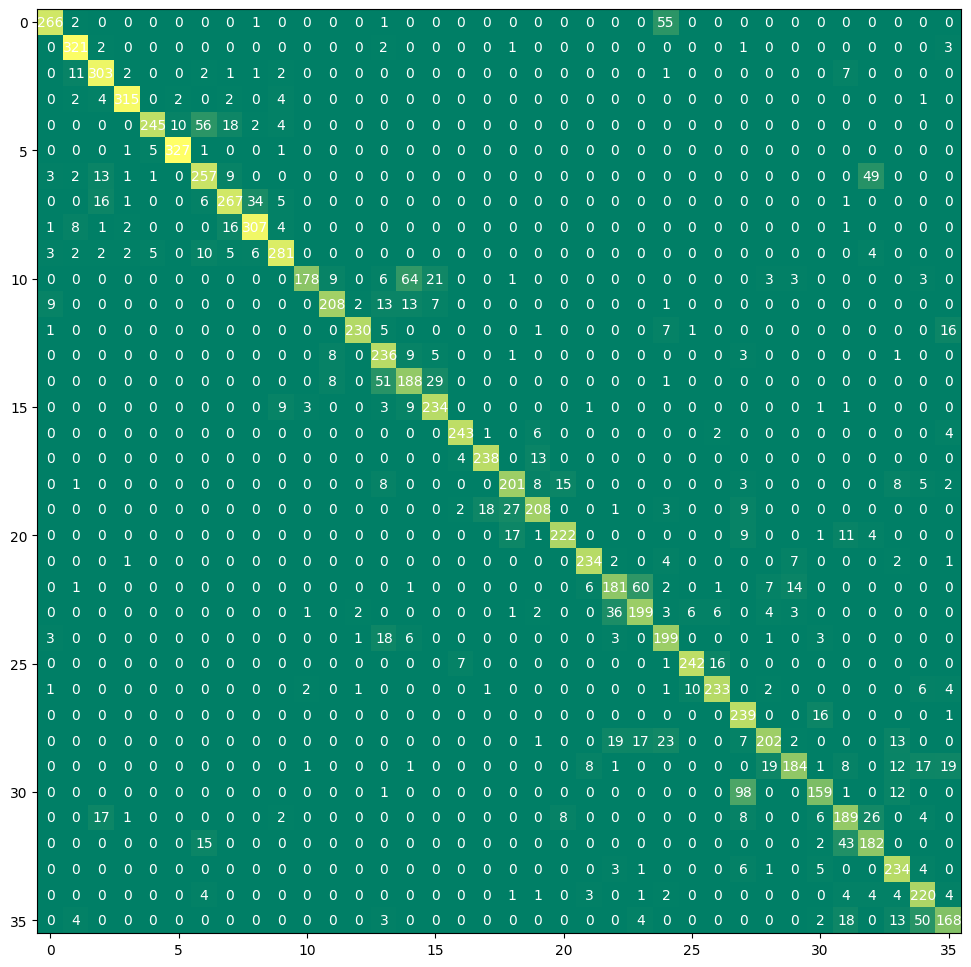

In [28]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(conf_matrix, cmap='summer')
for r in range(num_classes):
    for c in range(num_classes):
        ax.text(c, r, str(conf_matrix[r, c]), 
                ha='center', va='center', color='white', fontsize='medium')
        
plt.savefig(os.path.join('metrics', 'final_conf_matrix'))
plt.show()

In [37]:
corrects = []
wrongs = []
for r in range(num_classes):
    wrong = 0
    for c in range(num_classes):
        if r == c:
            corrects.append(conf_matrix[r, c])
        else:
            wrong += conf_matrix[r, c]
    wrongs.append(wrong)
corrects = np.array(corrects)
wrongs = np.array(wrongs)

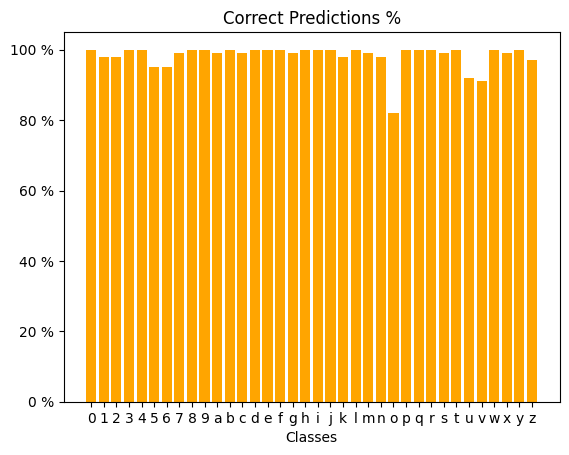

In [38]:
# Plot the accuracy for each class

x = np.arange(36)
y = (corrects / (corrects + wrongs)) * 100
plt.bar(x, y, color='orange')
plt.title('Correct Predictions %')
plt.xlabel('Classes')
plt.xticks(x, labels=chars)
plt.yticks(np.arange(0, 100+1, 20), labels=['{} %'.format(x) for x in np.arange(0, 100+1, 20)])

#plt.savefig(os.path.join('metrics', 'Pred_acc2'))
plt.show()

## Testing on a different dataset

In [29]:
from PIL import Image

In [56]:
test_data = [[], []] #x_test, y_test
upper = st.digits + st.ascii_uppercase
path = os.path.join('test dataset')

for fold in os.listdir(path):
    for img_name in os.listdir(os.path.join(path, fold)):
        img = Image.open(os.path.join(path, fold, img_name))
        img = img.resize((80, 80)).convert(mode='L')
        a = np.asarray(img).astype('int16')
        test_data[0].append(a)
        test_data[1].append((lambda fold : upper.index(fold))(fold))
test_data[0] = np.asarray(test_data[0])
test_data[1] = np.asarray(test_data[1])

In [68]:
x_test, y_test = test_data

In [69]:
x_test = x_test.reshape(104, 80, 80, 1)

In [70]:
predictions = model.predict(x_test)
wrongs = 0
corrects = 0
for prediction, label in zip(predictions, y_test):
    if np.argmax(prediction) == label:
        corrects += 1
    else:
        wrongs += 1
accuracy = corrects / (corrects + wrongs)
accuracy

4/4 [==============================] - 0s 65ms/step


0.038461538461538464

In [91]:
np.argmax(model.predict(np.asarray(Image.open('y.jpg').resize((80, 80)).convert(mode='L'), dtype='int16').reshape(1, 80, 80, 1)))

1/1 [==============================] - 0s 39ms/step


34